In [8]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from RecUnet import *
from train_RecUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


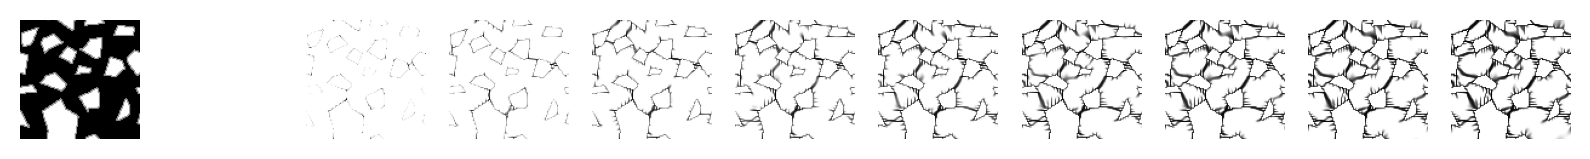

In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage = data.__getitem__(1000)
loaders = get_loaders(data, 1)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [3]:
args = {'lr' : 0.001, 'epochs' : 200, 'dev' : dev, 'name' : 'RecUnet'}

In [6]:
unet = RecUNet()

Using device: cpu


In [ ]:
unet = load_network(unet, args['name'], args)

In [15]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  4872.1669921875
Epoch: 0 batch: 100 mean train loss:  4943.4604492188
Epoch: 0 batch: 200 mean train loss:  4664.3032226562
Epoch: 0 batch: 300 mean train loss:  4461.9472656250
Epoch: 0 batch: 400 mean train loss:  4504.3129882812
Epoch: 0 batch: 500 mean train loss:  4077.3027343750


KeyboardInterrupt: 

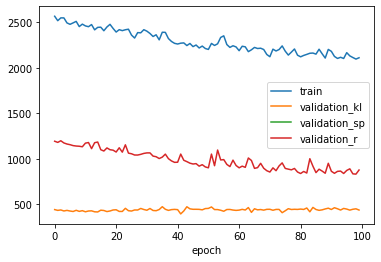

In [28]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation_kl', 'validation_sp', 'validation_r'])

In [24]:
train_data = next(iter(loaders['train']))[0].to(args['dev'])

In [8]:
unet = unet.to(args['dev'])

In [9]:
y = unet(train_data)